## Import Library & Dataset

In [1]:
#1. Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#2. Import Data
df = pd.read_csv("dataset/Indian Kids Screen Time.csv")
df.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


## Inspect Data

In [3]:
#3. Inspect Data
#3a. Menampilkan nama kolom
df.columns

Index(['Age', 'Gender', 'Avg_Daily_Screen_Time_hr', 'Primary_Device',
       'Exceeded_Recommended_Limit', 'Educational_to_Recreational_Ratio',
       'Health_Impacts', 'Urban_or_Rural'],
      dtype='object')

In [4]:
#3. Inspect Data
#3b. Untuk menampilkan type data masing-masing kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


In [5]:
#3. Inspect Data
#3c. mendeteksi kolom duplikasi
df.duplicated().sum()

np.int64(44)

In [6]:
#3. Inspect Data
#3d. menghapus kolom duplikat
df = df.drop_duplicates()
df.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


In [7]:
#3. Inspect Data
#3e. Memisahkan kolom berdasarkan type data numerik dan kategorikal
categoricals  = df.select_dtypes(exclude = ["number"]).columns.tolist()
numerics = df.select_dtypes(include = ["number"]).columns.tolist()

## Describe Data

In [8]:
#4. Describe Dataset
#4a. mendeskripsikan data numerik
df.describe().round(2)

,Age,Avg_Daily_Screen_Time_hr,Educational_to_Recreational_Ratio
count,9668.00,9668.00,9668.00
mean,12.99,4.37,0.43
std,3.16,1.70,0.07
min,8.00,0.00,0.30
25%,10.00,3.43,0.37
50%,13.00,4.44,0.43
75%,16.00,5.38,0.48
max,18.00,13.89,0.60


In [9]:
#4. Describe Dataset
#4b. mendeskripsikan data kategorikal
df.describe(include="object")

,Gender,Primary_Device,Health_Impacts,Urban_or_Rural
count,9668,9668,6488,9668
unique,2,4,15,2
top,Male,Smartphone,Poor Sleep,Urban
freq,4928,4540,2264,6810


## Missing Value

In [10]:
#5. Cari Missing Value
#5a. Melihat missing value
df.isna().sum()

Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3180
Urban_or_Rural                          0
dtype: int64

In [11]:
#5. Missing Value
#5b. Menghapus missing value
df = df.dropna()
df.shape

(6488, 8)

## Outlier

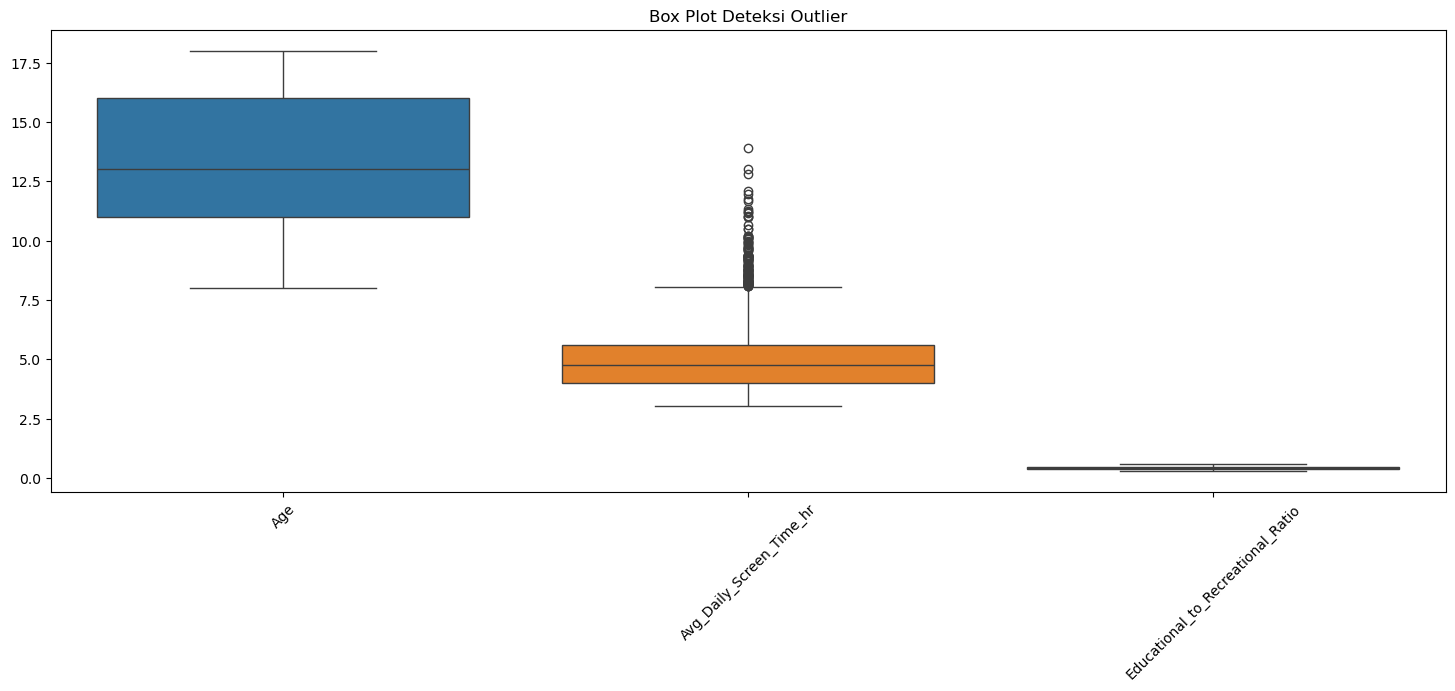

In [12]:
#6. Outlier
#6a. Melihat letak outlier
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(18, 6))
sns.boxplot(data=df[numerics])
plt.title("Box Plot Deteksi Outlier")
plt.xticks(rotation=45)
plt.show()

In [13]:
#6. Outlier
#6a. Menghitung Outlier dengan metode IQR
#Hitung Q1, Q3 dan IQR untuk kolom numerik
Q1 = df[numerics].quantile(0.25)
Q3 = df[numerics].quantile(0.75)
IQR = Q3 - Q1


#Tentukan batas bawah dan atas
lower_bound = Q1 - 1.5 *IQR
upper_bound = Q3 + 1.5 * IQR

#Filter baris oulier
df_outliers = df[((df[numerics] < lower_bound)| (df[numerics] > upper_bound)).any(axis=1)]
print("Data Outlier :", df_outliers.shape[0], "baris") 

Data Outlier : 134 baris


In [14]:
#6. Outlier
#Ambil baris yang tidak memiliki outliers
df_no_outliers = df[~((df[numerics] < lower_bound)| (df[numerics] > upper_bound)).any(axis=1)]
print("Data sebelum : ", df.shape[0], "baris") 
print("Data sesudah : ", df_no_outliers.shape[0], "baris") 

Data sebelum :  6488 baris
Data sesudah :  6354 baris


## Feature Engineering

In [15]:
#7. Feature Enginering
#7a. Menambah kolom klasifikasi usia
df_no_outliers["Age Classification"] = [
    "Children" if (8 <= n <= 9)
    else "Early Adolescence" if (9 < n <= 13)
    else "Middle Adolescence"
    for n in df_no_outliers["Age"]
]

#7b. Menambahkan kolom kategori Screen Time
bins = [0, 3, 6, 12]
labels = ['Rendah (<3 jam)', 'Sedang (3–6 jam)', 'Tinggi (>6 jam)']
df_no_outliers['ScreenTime_Category'] = pd.cut(df_no_outliers['Avg_Daily_Screen_Time_hr'], bins=bins, labels=labels)

#7c. Membuat kolom dampak kesehatan biner
for col in ["Anxiety", "Poor_Sleep", "Obesity_Risk", "Eye_Strain"]:
    df_no_outliers[col] = df_no_outliers["Health_Impacts"].str.contains(col.replace("_", " ")).astype(int)

# 7d. Misahkan value pada kolom Primary Device
for i in ["Smartphone", "TV", "Laptop", "Tablet"]:
    df_no_outliers[i] = df_no_outliers["Primary_Device"].str.contains(col.replace("_", " ")).astype(int)

df_no_outliers.head()

C:\Users\siapa\AppData\Local\Temp\ipykernel_4132\1279357143.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers["Age Classification"] = [
C:\Users\siapa\AppData\Local\Temp\ipykernel_4132\1279357143.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['ScreenTime_Category'] = pd.cut(df_no_outliers['Avg_Daily_Screen_Time_hr'], bins=bins, labels=labels)
C:\Users\siapa\AppData\Local\Temp\ipykernel_4132\1279357143.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Age Classification,ScreenTime_Category,Anxiety,Poor_Sleep,Obesity_Risk,Eye_Strain,Smartphone,TV,Laptop,Tablet
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban,Middle Adolescence,Sedang (3–6 jam),0,1,0,1,0,0,0,0
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban,Early Adolescence,Sedang (3–6 jam),0,1,0,0,0,0,0,0
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban,Middle Adolescence,Sedang (3–6 jam),0,1,0,0,0,0,0,0
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban,Early Adolescence,Sedang (3–6 jam),1,1,0,0,0,0,0,0
5,14,Female,4.88,Smartphone,True,0.44,Poor Sleep,Urban,Middle Adolescence,Sedang (3–6 jam),0,1,0,0,0,0,0,0


In [16]:
df_no_outliers.describe().round(2)

,Age,Avg_Daily_Screen_Time_hr,Educational_to_Recreational_Ratio,Anxiety,Poor_Sleep,Obesity_Risk,Eye_Strain,Smartphone,TV,Laptop,Tablet
count,6354.00,6354.00,6354.00,6354.00,6354.00,6354.00,6354.00,6354.0,6354.0,6354.0,6354.0
mean,13.45,4.83,0.42,0.25,0.75,0.19,0.37,0.0,0.0,0.0,0.0
std,3.00,1.09,0.07,0.43,0.43,0.39,0.48,0.0,0.0,0.0,0.0
min,8.00,3.01,0.30,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
25%,11.00,3.98,0.36,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
50%,14.00,4.72,0.42,0.00,1.00,0.00,0.00,0.0,0.0,0.0,0.0
75%,16.00,5.55,0.47,0.00,1.00,0.00,1.00,0.0,0.0,0.0,0.0
max,18.00,8.04,0.60,1.00,1.00,1.00,1.00,0.0,0.0,0.0,0.0


In [17]:
df_no_outliers.describe(exclude = "number").round(2)

,Gender,Primary_Device,Exceeded_Recommended_Limit,Health_Impacts,Urban_or_Rural,Age Classification,ScreenTime_Category
count,6354,6354,6354,6354,6354,6354,6354
unique,2,4,1,15,2,3,2
top,Male,Smartphone,True,Poor Sleep,Urban,Middle Adolescence,Sedang (3–6 jam)
freq,3272,3041,6354,2204,4500,3204,5382


## Filtering

In [18]:
#Filtering: Anak dengan screen time tinggi
filtering = df_no_outliers[df_no_outliers["ScreenTime_Category"] == "Tinggi (>6 jam)"]

# Distribusi berdasarkan gender dan kategori usia
highscreen = pd.crosstab(filtering["Gender"], filtering["Age Classification"])
highscreen

Age Classification,Children,Early Adolescence,Middle Adolescence
Gender,,,
Female,118,186,179
Male,133,163,193


## Grouping

In [19]:
#8. Agregasi dan Grouping
#8b. Grouping
#Menghitung rata-rata waktu menonton berdasarkan klasifikasi umur dan jenis kelamin
rata_waktu_umur_gender = df_no_outliers.groupby(["Age Classification", "Gender"])[
    ["Avg_Daily_Screen_Time_hr", "Educational_to_Recreational_Ratio"]].mean().round(2)
rata_waktu_umur_gender

Avg_Daily_Screen_Time_hr  \
Age Classification Gender                             
Children           Female                      5.17   
                   Male                        5.23   
Early Adolescence  Female                      4.84   
                   Male                        4.78   
Middle Adolescence Female                      4.76   
                   Male                        4.74   

                           Educational_to_Recreational_Ratio  
Age Classification Gender                                     
Children           Female                               0.50  
                   Male                                 0.50  
Early Adolescence  Female                               0.42  
                   Male                                 0.42  
Middle Adolescence Female                               0.40  
                   Male                                 0.40

In [20]:
#8b. Grouping
#Menghitung rata-rata waktu menonton berdasarkan kategori umur
age_group = df_no_outliers.groupby("Age Classification")["Avg_Daily_Screen_Time_hr"].mean().reset_index()
age_group

,Age Classification,Avg_Daily_Screen_Time_hr
0,Children,5.201452
1,Early Adolescence,4.807547
2,Middle Adolescence,4.746242


## Aggregation

In [21]:
#Agregasi beberapa statistik sekaligus berdasarkan device yang digunakan
agg_data = df_no_outliers.groupby(["Age Classification", "Gender"])["Avg_Daily_Screen_Time_hr"].agg(["mean", "min", "max", "count"]).round(2)
agg_data['Percentage'] = (agg_data['count'] / len(df_no_outliers)) * 100
agg_data['Percentage'] = agg_data['Percentage'].round(2).astype(str) + ' %'
agg_data

mean   min   max  count Percentage
Age Classification Gender                                    
Children           Female  5.17  3.01  8.02    376     5.92 %
                   Male    5.23  3.01  8.04    430     6.77 %
Early Adolescence  Female  4.84  3.01  7.97   1169     18.4 %
                   Male    4.78  3.02  7.93   1175    18.49 %
Middle Adolescence Female  4.76  3.01  8.04   1537    24.19 %
                   Male    4.74  3.01  8.03   1667    26.24 %

## Cross Tabulation

In [22]:
# Distribusi screen time category berdasarkan usia
cross_tab = pd.crosstab(df_no_outliers["Age Classification"], df_no_outliers["ScreenTime_Category"])
cross_tab

ScreenTime_Category,Sedang (3–6 jam),Tinggi (>6 jam)
Age Classification,,
Children,555,251
Early Adolescence,1995,349
Middle Adolescence,2832,372


In [23]:
# Distribusi screen time tinggi berdasarkan gender dan usia
high_distribution = pd.crosstab(filtering["Gender"], filtering["Age Classification"])
high_distribution

Age Classification,Children,Early Adolescence,Middle Adolescence
Gender,,,
Female,118,186,179
Male,133,163,193


## Visualisasi

### Univariate

C:\Users\siapa\AppData\Local\Temp\ipykernel_4132\4137994531.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_no_outliers, x="Age Classification", palette="coolwarm")


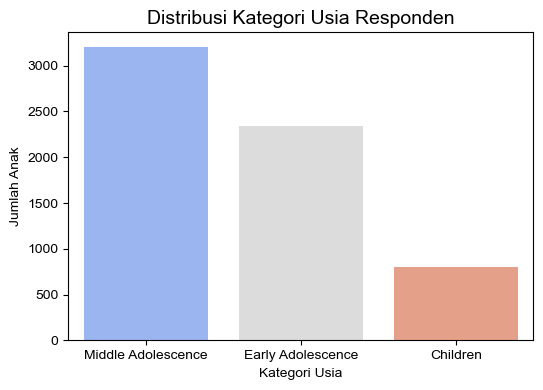

In [24]:
#Visualisasi Bar Chart
#Distribusi Kategori Usia Responden

plt.figure(figsize=(6,4))
sns.countplot(data=df_no_outliers, x="Age Classification", palette="coolwarm")
plt.style.use("seaborn-v0_8-whitegrid")
plt.title("Distribusi Kategori Usia Responden", fontsize=14)
plt.xlabel("Kategori Usia")
plt.ylabel("Jumlah Anak")
plt.show()

Mayoritas responden berada pada kategori Middle Adolescence (usia 14–18 tahun). 
Hal ini menyebabkan kelompok usia Middle Adolescence yaitu usia 14 hingga 18 tahun menjadi kelompok dengan proporsi tertinggi dalam penggunaan layar harian pada data yang kita analisis.

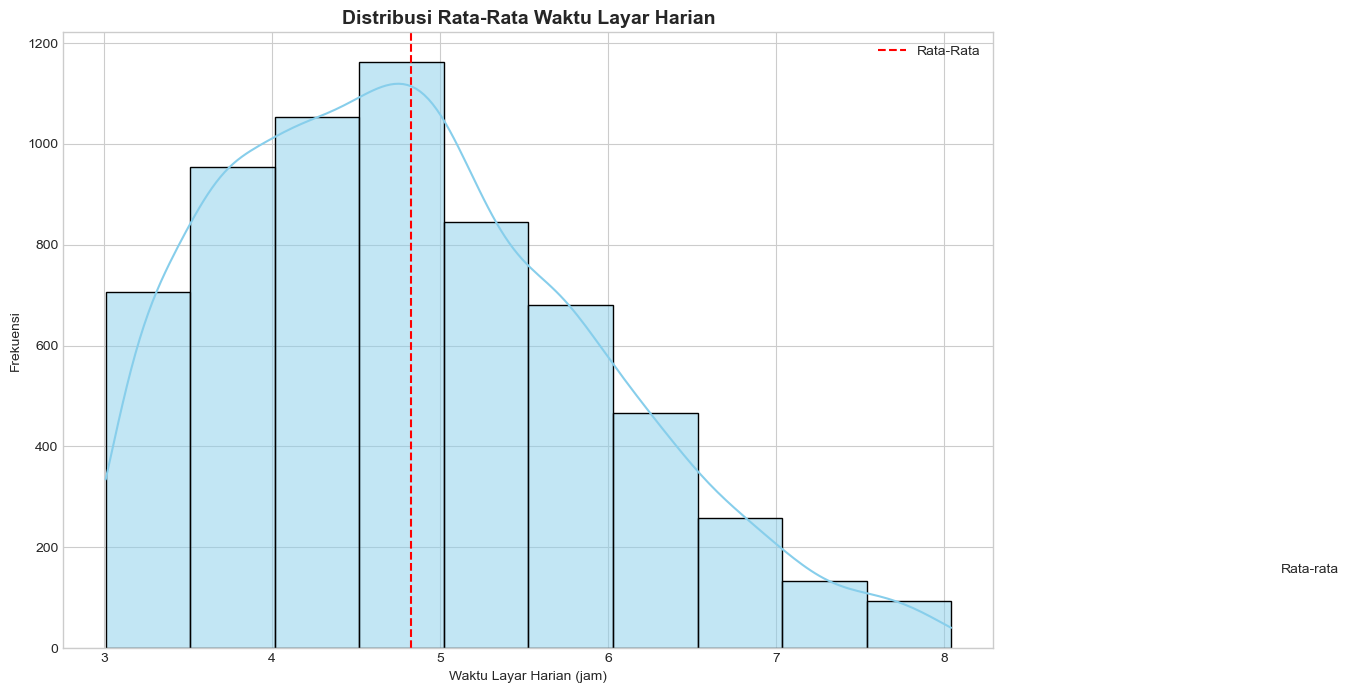

In [25]:
# Visualisasi Histogram —
# Distribusi Waktu Layar Harian

plt.figure(figsize=(12, 8))
sns.histplot(df_no_outliers['Avg_Daily_Screen_Time_hr'], bins=10, kde=True, color='skyblue')
plt.title('Distribusi Rata-Rata Waktu Layar Harian', fontsize=14, fontweight='bold')
plt.xlabel('Waktu Layar Harian (jam)')
plt.ylabel('Frekuensi')
plt.axvline(df_no_outliers['Avg_Daily_Screen_Time_hr'].mean(), color='red', linestyle='--', label="Rata-Rata")
plt.annotate("Rata-rata", xy = (df['Avg_Daily_Screen_Time_hr'].mean(), 100), xytext = (10,150))
plt.legend()
plt.show()

Rata-rata anak-anak di India menghabiskan sekitar 4,9 jam per hari untuk menatap layar — baik melalui smartphone, laptop, TV, maupun tablet.
Durasi ini tergolong sangat tinggi, karena melebihi rekomendasi WHO sebesar 2 jam per hari hingga 145% lebih lama.

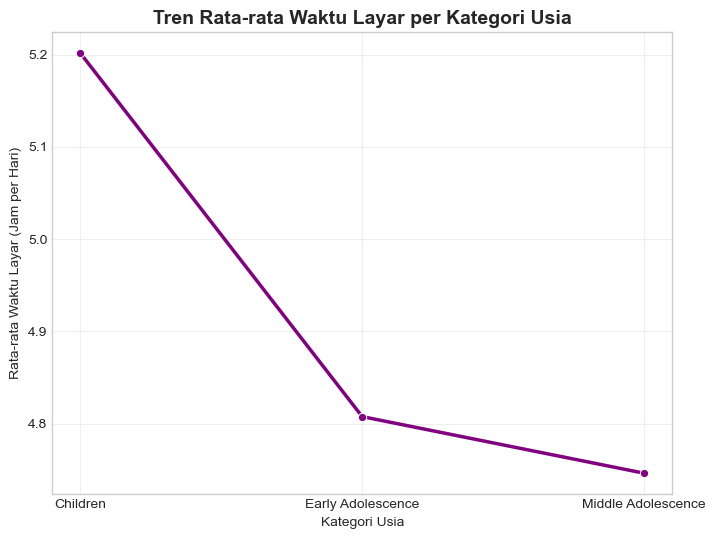

In [26]:
#Visualisasi Line Chart

plt.figure(figsize=(8,6))
sns.lineplot( data=age_group, x='Age Classification', y='Avg_Daily_Screen_Time_hr', marker='o', linewidth=2.5, color='purple')
plt.title('Tren Rata-rata Waktu Layar per Kategori Usia', fontsize=14, weight='bold')
plt.xlabel('Kategori Usia')
plt.ylabel('Rata-rata Waktu Layar (Jam per Hari)')
plt.grid(alpha=0.3)
plt.show()


Anak-anak (Children, usia 8–9 tahun) memiliki rata-rata waktu layar tertinggi, yaitu sekitar 5,2 jam per hari.
Ketika memasuki masa remaja awal (Early Adolescence, 10–13 tahun), durasi penggunaan layar mengalami penurunan ringan menjadi sekitar 4,8 jam per hari.
Tren ini terus menurun pada kelompok remaja tengah (Middle Adolescence, 14–18 tahun) hingga mencapai sekitar 4,75 jam per hari.

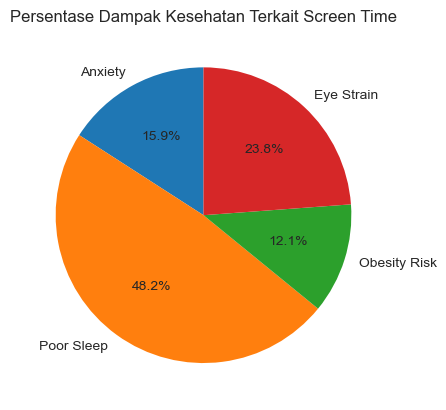

In [27]:
# Visualisasi Pie Chart
# Persentase Dampak Kesehatan yang paling sering dialami
impacts = {
    "Anxiety": df_no_outliers["Anxiety"].sum(),
    "Poor Sleep": df_no_outliers["Poor_Sleep"].sum(),
    "Obesity Risk": df_no_outliers["Obesity_Risk"].sum(),
    "Eye Strain": df_no_outliers["Eye_Strain"].sum()
}
plt.pie(impacts.values(), labels=impacts.keys(), autopct="%1.1f%%", startangle=90)
plt.title("Persentase Dampak Kesehatan Terkait Screen Time")
plt.show()

Dampak kesehatan paling dominan yang dialami anak-anak adalah gangguan tidur (Poor Sleep), mencakup hampir setengah dari seluruh responden (48,2%).
Disusul oleh ketegangan mata (Eye Strain) sebesar 23,8%. 
Selain itu, 15,9% anak melaporkan gejala kecemasan (Anxiety), sedangkan 12,1% lainnya berisiko mengalami obesitas. 

### Bivariate

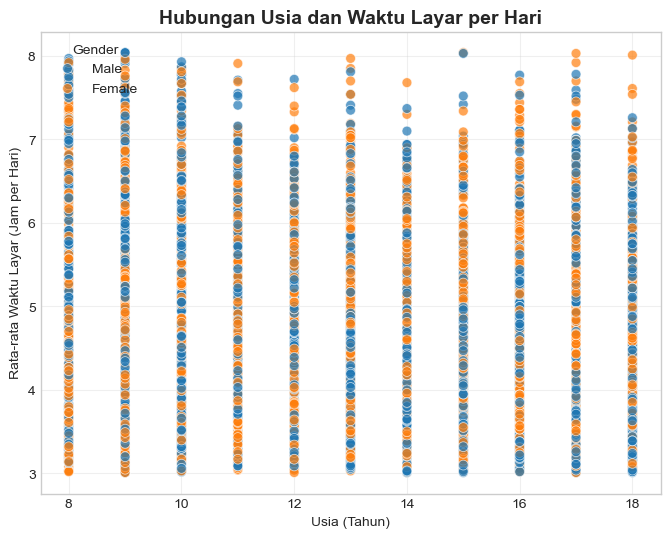

In [28]:
#Scatter Plot
#Hubungan Usia dan Waktu Layar
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_no_outliers, x='Age', y='Avg_Daily_Screen_Time_hr', hue='Gender', alpha=0.7, s=50)

plt.title('Hubungan Usia dan Waktu Layar per Hari', fontsize=14, weight='bold')
plt.xlabel('Usia (Tahun)')
plt.ylabel('Rata-rata Waktu Layar (Jam per Hari)')
plt.legend(title='Gender', loc='upper left')
plt.grid(alpha=0.3)
plt.show()


Berdasarkan scatter plot, tidak ditemukan tren yang kuat antara usia dan durasi screen time. Hampir semua kelompok usia (8–18 tahun) menunjukkan rata-rata waktu layar yang seragam di kisaran 4–6 jam per hari.
Ini berarti faktor usia tidak menjadi pendorong utama lamanya anak menggunakan perangkat digital.
Selain itu, pola antara laki-laki dan perempuan hampir identik, menunjukkan bahwa kebiasaan penggunaan layar tidak berbeda secara signifikan antar gender.

### Multivariat

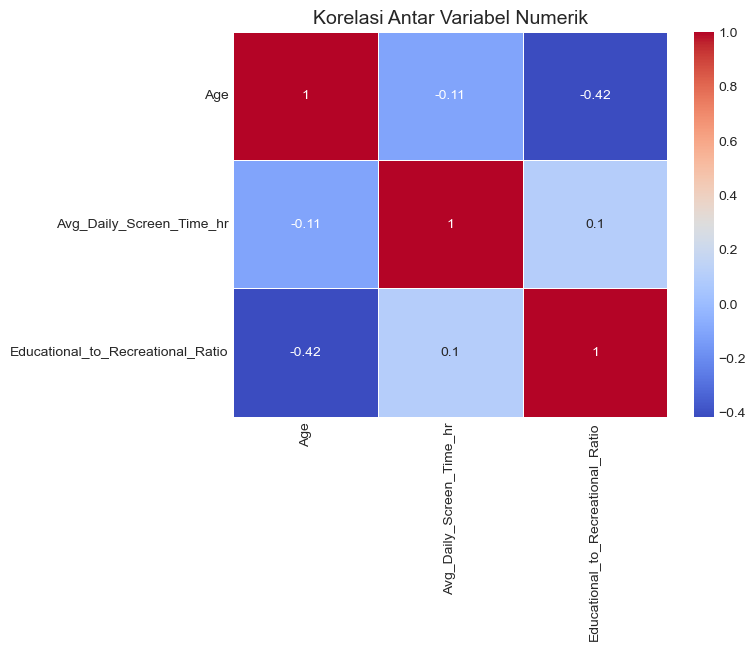

In [29]:
plt.style.use("seaborn-v0_8-whitegrid")
plt.figure(figsize=(7,5))

# Ambil kolom numerik
num_cols = ["Age", "Avg_Daily_Screen_Time_hr", "Educational_to_Recreational_Ratio"]

# Hitung korelasi dan tampilkan heatmap
sns.heatmap(df_no_outliers[num_cols].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Korelasi Antar Variabel Numerik", fontsize=14)
plt.show()

Korelasi antara Age dan Average Screen Time negatif lemah artinya tidak ada hubungan kuat antara keduanya
Korelasi antara Age dan Educational vs Rekreasi Ratio negatif sedang, artinya semakin bertambah usia anak-anak akan menggunakan perangkat untuk hiburan
Korelasi antara Screen Time dan Educational Ratio positif lemah artinya tidak ada hubungan kuat antara keduanya

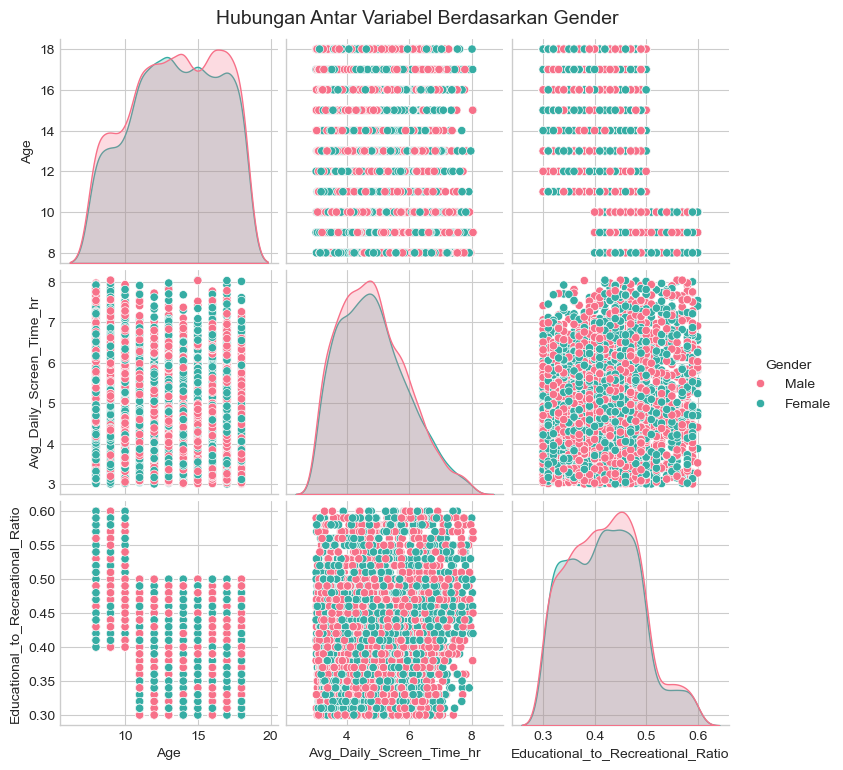

In [30]:
#Pairplot
#Hubungan antar variabel numerik berdasarkan Gender

sns.pairplot(
    df_no_outliers, vars=["Age", "Avg_Daily_Screen_Time_hr", "Educational_to_Recreational_Ratio"],
    hue="Gender", palette="husl", diag_kind="kde"
)
plt.suptitle("Hubungan Antar Variabel Berdasarkan Gender", y=1.02, fontsize=14)
plt.show()

Grafik pairplot dapat digunakan untuk mengetahui distribusi antar variabel numerik. Grafik disamping  menunjukkan pola yang relatif serupa antara laki-laki dan perempuan.
Baik pada variabel usia (Age) maupun durasi penggunaan layar (Avg_Daily_Screen_Time_hr), kedua gender memperlihatkan sebaran data yang hampir identik tanpa perbedaan ekstrem.

### Visualisasi Cros Tab, Filtering, Grouping

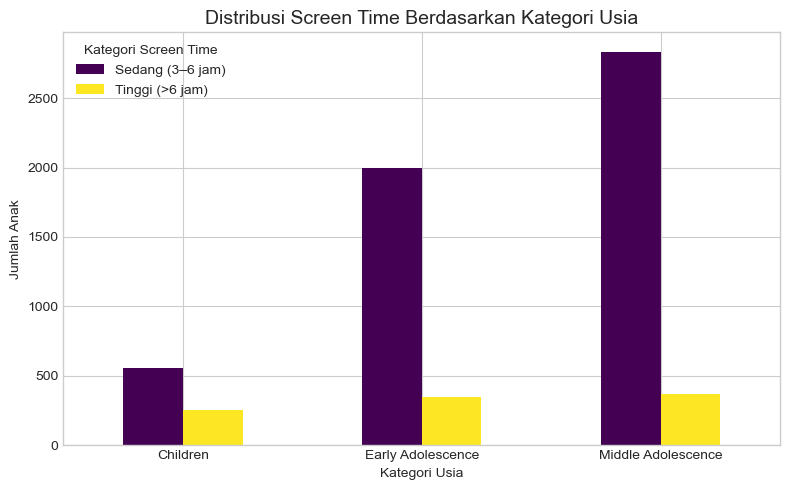

In [31]:
# Visualisasi Cross Tabulation dalam bentuk bar chart
cross_tab.plot(kind='bar', figsize=(8,5), colormap='viridis')
plt.style.use("seaborn-v0_8-whitegrid")
plt.title("Distribusi Screen Time Berdasarkan Kategori Usia", fontsize=14)
plt.xlabel("Kategori Usia")
plt.ylabel("Jumlah Anak")
plt.xticks(rotation=0)
plt.legend(title="Kategori Screen Time")
plt.tight_layout()
plt.show()

Grafik pairplot dapat digunakan untuk mengetahui distribusi antar variabel numerik. Grafik disamping  menunjukkan pola yang relatif serupa antara laki-laki dan perempuan.
Baik pada variabel usia (Age) maupun durasi penggunaan layar (Avg_Daily_Screen_Time_hr), kedua gender memperlihatkan sebaran data yang hampir identik tanpa perbedaan ekstrem.

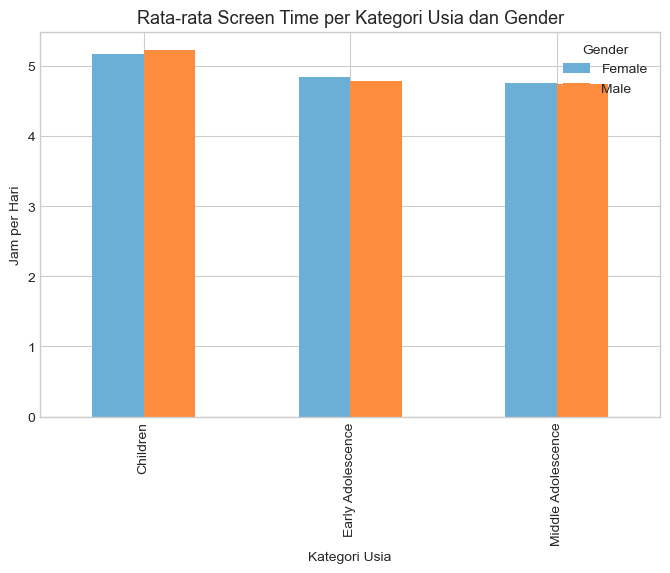

In [32]:
# Visualisasi hasil grouping
rata_waktu_umur_gender['Avg_Daily_Screen_Time_hr'].unstack().plot(kind='bar', figsize=(8,5), color=['#6baed6', '#fd8d3c'])
plt.style.use("seaborn-v0_8-whitegrid")
plt.title("Rata-rata Screen Time per Kategori Usia dan Gender", fontsize=13)
plt.ylabel("Jam per Hari")
plt.xlabel("Kategori Usia")
plt.show()

Rata-rata waktu layar menurun seiring bertambahnya usia, dari anak-anak ke remaja. Perbedaan antara laki-laki dan perempuan hampir tidak signifikan di semua kelompok usia

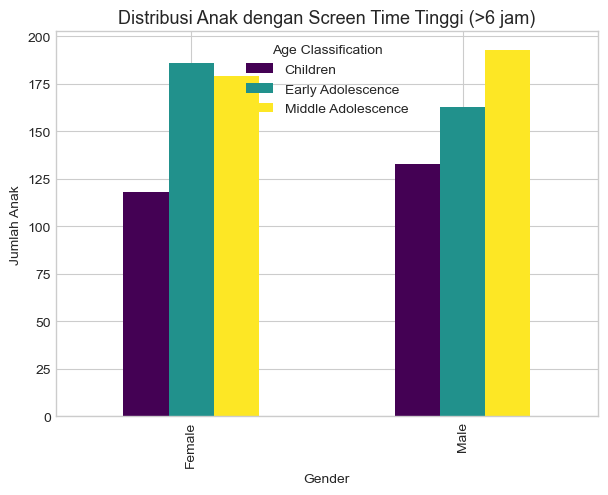

In [33]:
# Visualisasi distribusi anak dengan screen time tinggi
high_distribution.plot(kind='bar', figsize=(7,5), colormap='viridis')
plt.style.use("seaborn-v0_8-whitegrid")
plt.title("Distribusi Anak dengan Screen Time Tinggi (>6 jam)", fontsize=13)
plt.xlabel("Gender")
plt.ylabel("Jumlah Anak")
plt.show()

Early Adolescence dan Middle Adolescence mendominasi kelompok dengan durasi layar tinggi diatas 6 jam. 

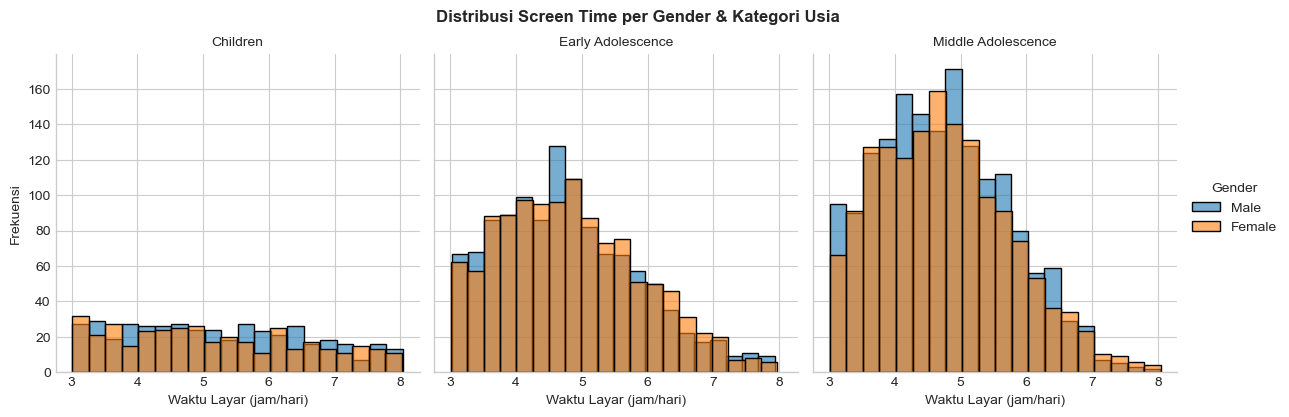

In [34]:
#Histogram FacetGrid: Distribusi Screen Time per Gender berdasarkan kelompok usia
g = sns.FacetGrid(
    df_no_outliers,
    col="Age Classification",
    hue="Gender",
    col_order=["Children", "Early Adolescence", "Middle Adolescence"],
    height=4, aspect=1, sharex=True, sharey=True
)
g.map_dataframe(
    sns.histplot,
    x="Avg_Daily_Screen_Time_hr", bins=20, kde=False, alpha=0.6
)
g.add_legend(title="Gender")
g.set_axis_labels("Waktu Layar (jam/hari)", "Frekuensi")
g.set_titles("{col_name}")
g.fig.suptitle("Distribusi Screen Time per Gender & Kategori Usia", y=1.03, fontsize=12, fontweight="bold")
plt.show()

Puncak screen time terjadi pada usia Middle Adolescence yaitu 4–5 jam/hari
 Perbedaan gender tidak signifikan, namun pola penggunaan sedikit berbeda antar kelompok usia.

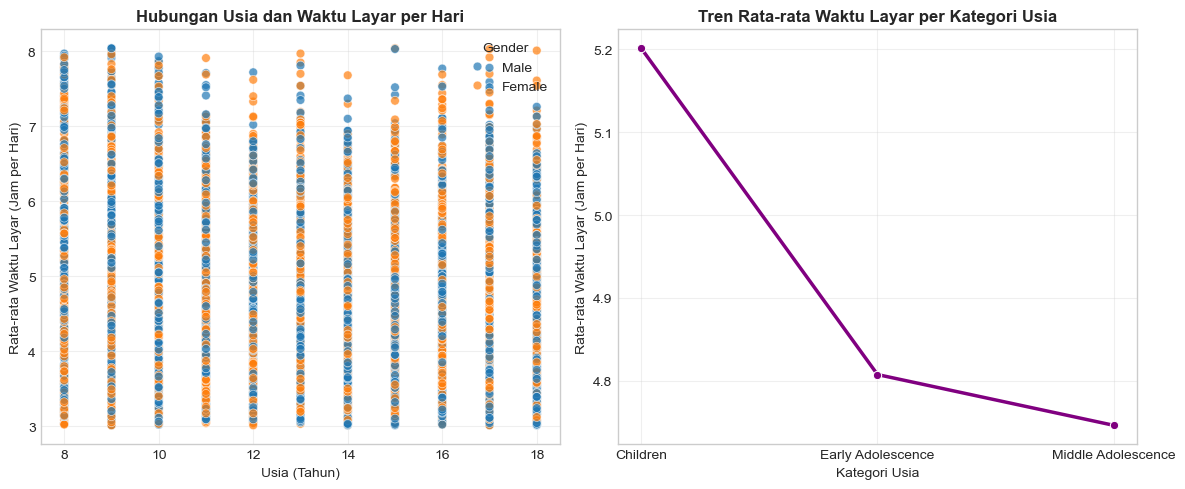

In [35]:
# Subplot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(data=df_no_outliers, x="Age", y="Avg_Daily_Screen_Time_hr", hue="Gender", alpha=0.7, s=40, ax=axes[0])
axes[0].set_title("Hubungan Usia dan Waktu Layar per Hari", fontsize=12, weight="bold")
axes[0].set_xlabel("Usia (Tahun)")
axes[0].set_ylabel("Rata-rata Waktu Layar (Jam per Hari)")
axes[0].grid(alpha=0.3)

sns.lineplot(data=age_group, x="Age Classification", y="Avg_Daily_Screen_Time_hr", marker="o", color="purple", linewidth=2.5, ax=axes[1])
axes[1].set_title("Tren Rata-rata Waktu Layar per Kategori Usia", fontsize=12, weight="bold")
axes[1].set_xlabel("Kategori Usia")
axes[1].set_ylabel("Rata-rata Waktu Layar (Jam per Hari)")
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

Dengan Subplot diperloh informasi bahwa anak-anak usia 8–9 tahun memiliki waktu layar tertinggi (~5,2 jam/hari). Durasi menurun pada Early Adolescence dan Middle Adolescence, menunjukkan perubahan kebiasaan digital seiring bertambahnya usia.
 Sebaran antara laki-laki dan perempuan hampir identik, menandakan perbedaan gender tidak signifikan.

In [36]:
#Save Data Bersih ke CSV
df_clean = df_no_outliers.copy()
df_clean.to_csv("dataset/Data Cleaned.csv", index = False)